In [1]:
import pymesh
import numpy as np
import pandas as pd
import math

In [2]:
landmarks = pd.read_csv("../data_artificial_cites/landmarks_reales/model_mesh_037.pts",header=None,index_col=[0],skiprows=range(2),delimiter=r"\s+")
mesh = pymesh.load_mesh("./out/torsos/model_mesh_037.ply")

In [3]:
ls0 = landmarks.iloc[0].tolist()
ls1 = landmarks.iloc[4].tolist()
ls2 = landmarks.iloc[9].tolist()
ls3 = landmarks.iloc[10].tolist()
head = landmarks.iloc[14].tolist()
foot_left = landmarks.iloc[7].tolist()
foot_right = landmarks.iloc[6].tolist()
knee_left = landmarks.iloc[8].tolist()
knee_right = landmarks.iloc[5].tolist()
center_knee = np.array([knee_left,knee_right]).mean(0)

In [4]:
def distance3D(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

semi_landmark = np.array([ls1,ls2]).mean(0)
distancias = []
for v in mesh.vertices:
    distancias.append(distance3D(semi_landmark,v))
distancias = np.array(distancias)
centro = mesh.vertices[distancias.argmin()]
distancias.argmin()


26727

In [5]:
delta = [0.4,0.0003,0.4]
xdot = (head[0]*center_knee[0] + head[1]*center_knee[1] + head[2]*center_knee[2])
norma = math.sqrt(head[0]**2+head[1]**2+head[2]**2) * math.sqrt(center_knee[0]**2+center_knee[1]**2+center_knee[2]**2)
angle_head = (math.cos(xdot/norma) ** -1)
angle_head_r = math.radians(90 - math.degrees(angle_head))
q = pymesh.misc.Quaternion(quat=[1,-angle_head_r, 0,0])

p1 = centro + delta
p2 =centro  -  delta
#r_p1 = q.rotate(p1)
#r_p2 = q.rotate(p2)

In [6]:
#c = pymesh.meshutils.generate_box_mesh([0,0,0],[0.01,0.15,0.2],1)

#c = pymesh.meshutils.generate_box_mesh([0,0,0.5],[0.01,2.5,2.5],1)
c = pymesh.meshutils.generate_box_mesh(p2,p1 ,1)

In [7]:
#translate axis y

In [8]:
matrix_translate = [[1,0,0,0],[0,1,0,0.05],[0,0,1,0],[0,0,0,1]]

In [9]:
alpha = math.pi /8
#matrix = [[1,0,0],[0,math.cos(alpha),-math.sin(alpha)],[0,math.sin(alpha),math.cos(alpha)],[0,0,0]]
matrix = [[1,0,0,0],[0,math.cos(alpha),-math.sin(alpha),0],[0,math.sin(alpha),math.cos(alpha),0],[0,0,0,1]]

for i,v in enumerate(c.vertices_ref):
    c.vertices_ref[i] = np.dot(matrix,[v[0],v[1],v[2],1])[:-1] 
    #c.vertices_ref[i] = np.dot(matrix,v)[:-1] 
pymesh.save_mesh("out/torso.ply", c)

In [10]:
 n = c.vertices_ref.mean(0)

In [11]:
d = pymesh.meshutils.generate_icosphere(0.01,centro)
pymesh.save_mesh("out/landk.ply", d)

In [12]:
d = pymesh.meshutils.generate_icosphere(0.01,[n[0],n[1],n[2]])
pymesh.save_mesh("out/landk_1.ply", d)

In [13]:
centro[1] - n[1]

-0.02825361570547652

In [14]:
matrix_translate = [[1,0,0,0],[0,1,0,abs(centro[1] - n[1])],[0,0,1,0],[0,0,0,1]]

In [15]:
# for i,v in enumerate(c.vertices_ref):
#     #c.vertices_ref[i] = np.dot(matrix_translate,[v[0],v[1],v[2],1])[:-1] 
#     c.vertices_ref[i] = [v[0],centro[1],v[2]]
#     #c.vertices_ref[i] = np.dot(matrix,v)[:-1] 
# pymesh.save_mesh("out/torso.ply", c)

In [16]:
output_mesh = pymesh.boolean(c, mesh, operation="intersection",engine="auto")

In [17]:
pymesh.save_mesh("out/feta-1.ply", output_mesh)

In [18]:
vertexs_2d = np.delete(output_mesh.vertices, [1], axis=1)

In [19]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import scipy

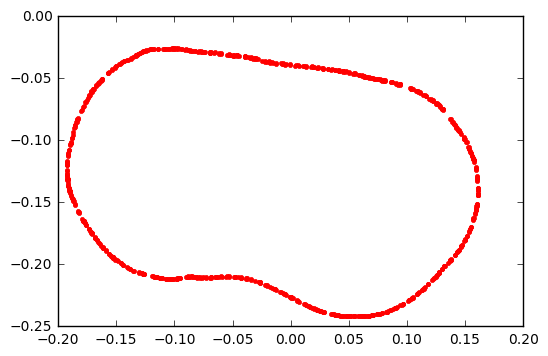

In [20]:
hull = ConvexHull(vertexs_2d,incremental=True)
#plt.plot(output_mesh.vertices[hull.vertices,0], output_mesh.vertices[hull.vertices,2], 'r.')
plt.plot(output_mesh.vertices[:,0], output_mesh.vertices[:,2], 'r.')
plt.show()

In [21]:
def distance2D(a, b):
        return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )

In [22]:
aux = 0
for i,v in enumerate(vertexs_2d[hull.vertices][:-1]):
    aux = aux + distance2D(v,vertexs_2d[hull.vertices][i+1])
aux = aux + distance2D(vertexs_2d[hull.vertices][0],vertexs_2d[hull.vertices][-1])
aux * 100

92.15939231989334

In [23]:
mx = np.mean(vertexs_2d[:,0])

In [24]:
my = np.mean(vertexs_2d[:,1])

In [25]:
vertexs_2d.sort?

In [26]:
pr1 = np.array(sorted(vertexs_2d, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))

In [27]:
pr1.shape

(850, 2)

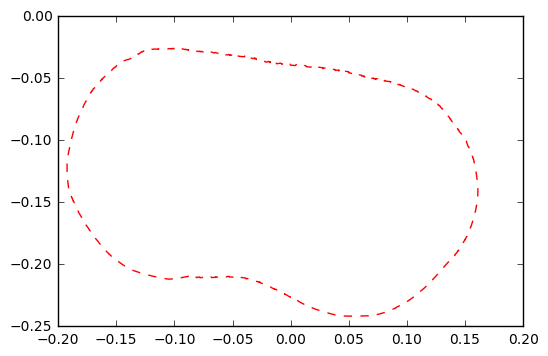

In [28]:
plt.plot(pr1[:,0], pr1[:,1], 'r--')
plt.show()

In [29]:
aux = 0
for i,v in enumerate(pr1[:-1]):
    aux = aux + distance2D(v,pr1[i+1])
aux = aux + distance2D(pr1[0],pr1[-1])
aux*100

99.17431850044312